<center><h1>Linear Regression & KNN on Combined Cycle Power Plant Data Set</h1></center>
<br>
<br>

Name: Chengyi Li
<br>
Github Username: ChengyiLi98
<br>

## 1. Combined Cycle Power Plant Data Set

### (a) Download Data

Package imports

In [1]:
import pandas as pd
import math
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import minmax_scale
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
%matplotlib inline

Get the Cycle Power Plant Data Set

In [2]:
path = r'../data/CCPP/Folds5x2_pp.xlsx'
df = pd.read_excel(path, sheet_name= 0) # only read sheet 1
df

,AT,V,AP,RH,PE
0,14.96,41.76,1024.07,73.17,463.26
1,25.18,62.96,1020.04,59.08,444.37
2,5.11,39.40,1012.16,92.14,488.56
3,20.86,57.32,1010.24,76.64,446.48
4,10.82,37.50,1009.23,96.62,473.90
...,...,...,...,...,...
9563,16.65,49.69,1014.01,91.00,460.03
9564,13.19,39.18,1023.67,66.78,469.62
9565,31.32,74.33,1012.92,36.48,429.57
9566,24.48,69.45,1013.86,62.39,435.74


### (b) Exploring the data

#### i. rows and columns

In [3]:
n_rows, n_columns = df.shape
print(f'There are {n_rows} rows and {n_columns} columns in the data set.')

There are 9568 rows and 5 columns in the data set.


Each row represents obervations (data points) collected from a Combined Cycle Power Plant over 6 years (2006-2011), when the power plant was set to work with full load, with features listing below.

The first column represent the feature Temperature,which is an independent variable.
<br>
The second column represent the feature Exhaust Vacuum, which is an independent variable.
<br>
The third column represent the feature Ambient Pressure, which is an independent variable.
<br>
The fourth column represent the feature Relative Humidity, which is an independent variable.
<br>
The fifth column represent the net hourly electrical energy output (EP) of the plant, which is a dependent variable.

#### ii. pairwise scatterplots of all the varianbles

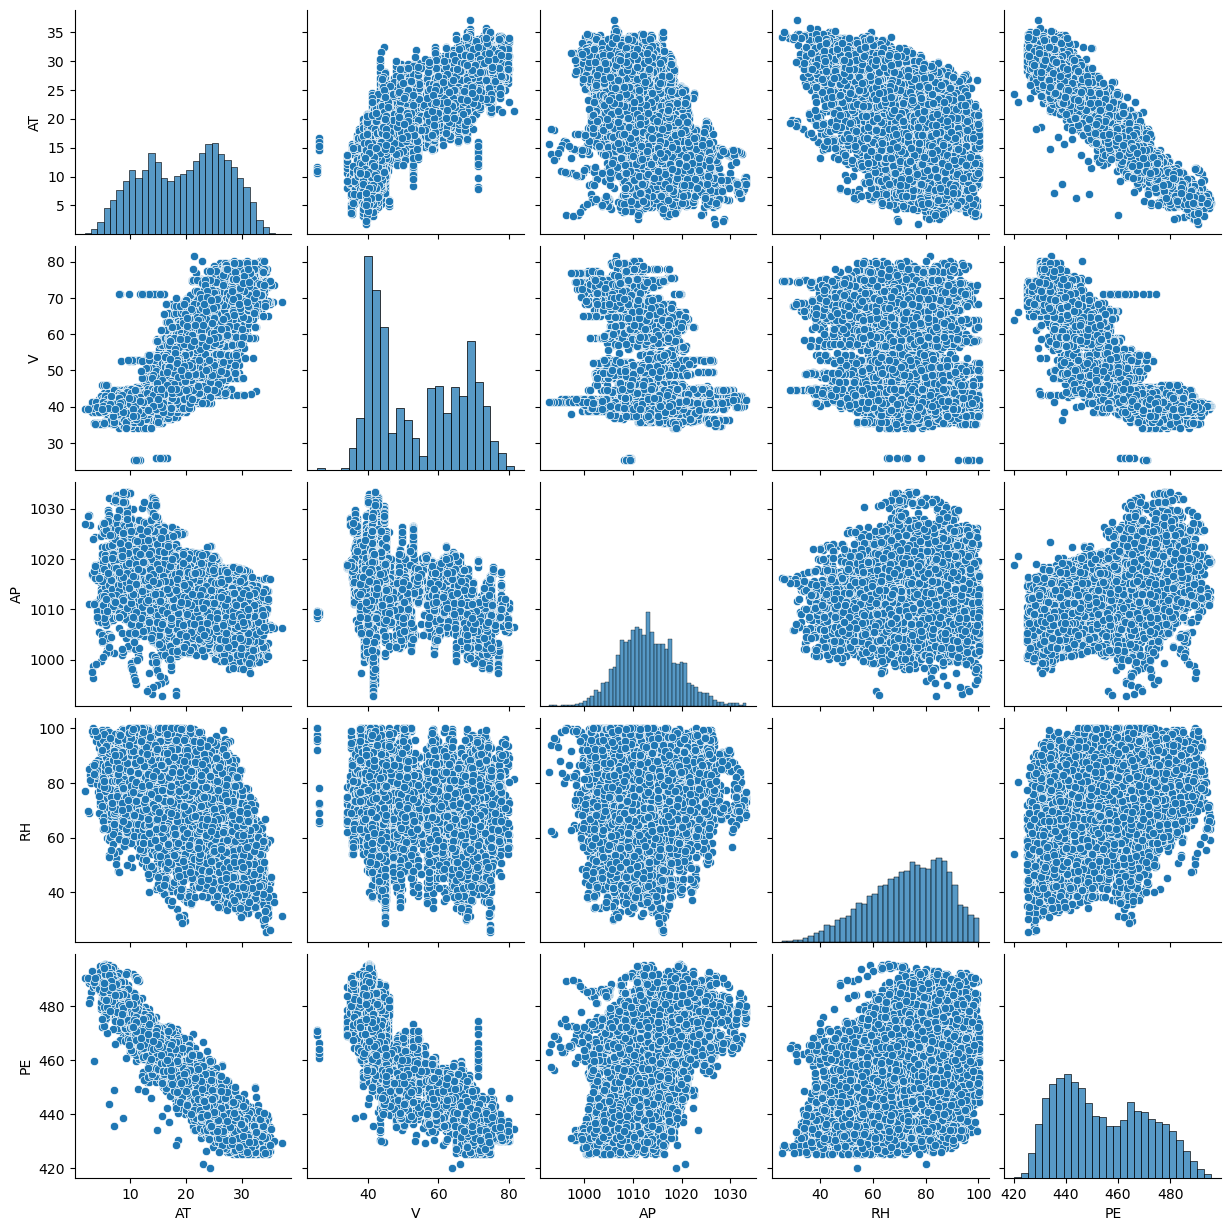

In [4]:
sns.pairplot(df)

In [5]:
df.corr()

,AT,V,AP,RH,PE
AT,1.000000,0.844107,-0.507549,-0.542535,-0.948128
V,0.844107,1.000000,-0.413502,-0.312187,-0.869780
AP,-0.507549,-0.413502,1.000000,0.099574,0.518429
RH,-0.542535,-0.312187,0.099574,1.000000,0.389794
PE,-0.948128,-0.869780,0.518429,0.389794,1.000000


We can see the linear relationships between each two of these numerical variables except the diagonal line by looking at the corrleation matrix. 

The correlation coefficients between AT & PE, V & PE are close to -1, which means they have strong negative correlation.

The correlation coefficients between AP & PE, RH & PE are close to 0.5, which means they have weak positive correlation.

Not having linear relationships between two variables does not mean that there is no other relationship between them.

#### iii. mean, the median, range, first and third quartiles, and interquartile ranges

In [6]:
table_1 = df.describe()
Mean = table_1.loc['mean']
Median = df.median()
Range = table_1.loc['max'] - table_1.loc['min']
Q1 = table_1.loc['25%']
Q3 = table_1.loc['75%']
IQR = Q3 -Q1

combined_df = pd.concat([Mean, Median,Range,Q1,Q3,IQR], axis=1)
combined_df.columns = ['Mean','Median','Range','Q1','Q3','IQR']
combined_df.T

,AT,V,AP,RH,PE
Mean,19.651231,54.305804,1013.259078,73.308978,454.365009
Median,20.345000,52.080000,1012.940000,74.975000,451.550000
Range,35.300000,56.200000,40.410000,74.600000,75.500000
Q1,13.510000,41.740000,1009.100000,63.327500,439.750000
Q3,25.720000,66.540000,1017.260000,84.830000,468.430000
IQR,12.210000,24.800000,8.160000,21.502500,28.680000


## (c) Simple Linear Regression

In [7]:
mr_fit_AT = sm.formula.ols('PE~AT', data = df).fit()
mr_fit_AT.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     PE   R-squared:                       0.899
Model:                            OLS   Adj. R-squared:                  0.899
Method:                 Least Squares   F-statistic:                 8.510e+04
Date:                Fri, 22 Sep 2023   Prob (F-statistic):               0.00
Time:                        11:07:56   Log-Likelihood:                -29756.
No. Observations:                9568   AIC:                         5.952e+04
Df Residuals:                    9566   BIC:                         5.953e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    497.0341      0.156   3177.280      0.000     496.727     497.341
AT            -2.1713      0.007   -291.715      0.000      -2.186      -2.157
==============================================================================
Omnibus:                      417.457   Durbin-Watson:                   2.033
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1117.844
Skew:                          -0.209   Prob(JB):                    1.83e-243
Kurtosis:                       4.621   Cond. No.                         59.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

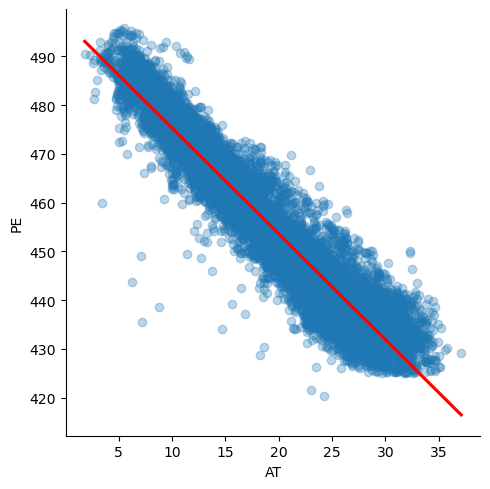

In [8]:
sns.lmplot(x = 'AT', y = 'PE', data = df, line_kws={'color': 'red'}, scatter_kws={'alpha': 0.3})

In [9]:
mr_fit_V = sm.formula.ols('PE~V', data = df).fit()
mr_fit_V.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     PE   R-squared:                       0.757
Model:                            OLS   Adj. R-squared:                  0.756
Method:                 Least Squares   F-statistic:                 2.972e+04
Date:                Fri, 22 Sep 2023   Prob (F-statistic):               0.00
Time:                        11:07:57   Log-Likelihood:                -33963.
No. Observations:                9568   AIC:                         6.793e+04
Df Residuals:                    9566   BIC:                         6.794e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    517.8015      0.378   1370.218      0.000     517.061     518.542
V             -1.1681      0.007   -172.402      0.000      -1.181      -1.155
==============================================================================
Omnibus:                       77.693   Durbin-Watson:                   2.007
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              109.571
Skew:                          -0.097   Prob(JB):                     1.61e-24
Kurtosis:                       3.487   Cond. No.                         245.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

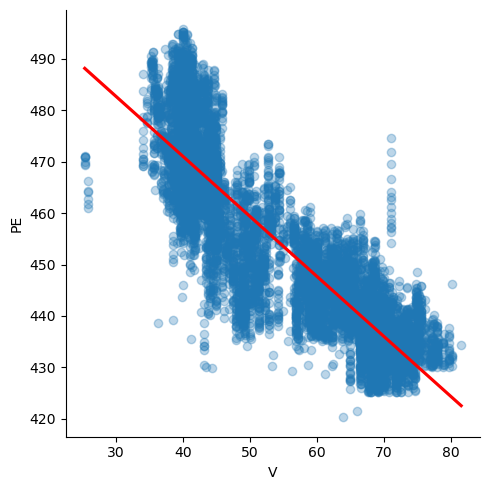

In [10]:
sns.lmplot(x = 'V', y = 'PE', data = df, line_kws={'color': 'red'}, scatter_kws={'alpha': 0.3})

In [11]:
mr_fit_AP = sm.formula.ols('PE~AP', data = df).fit()
mr_fit_AP.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     PE   R-squared:                       0.269
Model:                            OLS   Adj. R-squared:                  0.269
Method:                 Least Squares   F-statistic:                     3516.
Date:                Fri, 22 Sep 2023   Prob (F-statistic):               0.00
Time:                        11:07:57   Log-Likelihood:                -39224.
No. Observations:                9568   AIC:                         7.845e+04
Df Residuals:                    9566   BIC:                         7.847e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -1055.2610     25.459    -41.449      0.000   -1105.167   -1005.355
AP             1.4899      0.025     59.296      0.000       1.441       1.539
==============================================================================
Omnibus:                      525.438   Durbin-Watson:                   1.996
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              612.290
Skew:                           0.616   Prob(JB):                    1.10e-133
Kurtosis:                       2.859   Cond. No.                     1.73e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.73e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

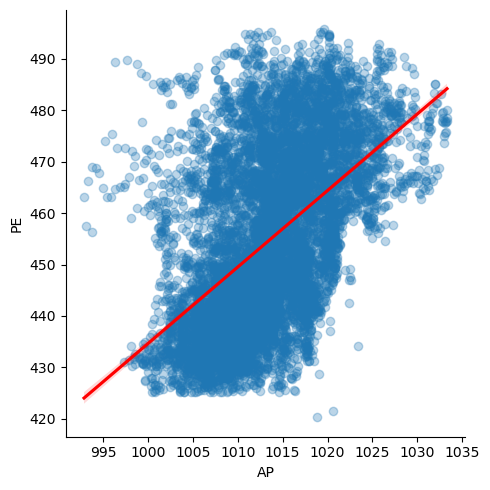

In [12]:
sns.lmplot(x = 'AP', y = 'PE', data = df, line_kws={'color': 'red'}, scatter_kws={'alpha': 0.3})

In [13]:
mr_fit_RH = sm.formula.ols('PE~RH', data = df).fit()
mr_fit_RH.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     PE   R-squared:                       0.152
Model:                            OLS   Adj. R-squared:                  0.152
Method:                 Least Squares   F-statistic:                     1714.
Date:                Fri, 22 Sep 2023   Prob (F-statistic):               0.00
Time:                        11:07:57   Log-Likelihood:                -39933.
No. Observations:                9568   AIC:                         7.987e+04
Df Residuals:                    9566   BIC:                         7.988e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    420.9618      0.823    511.676      0.000     419.349     422.574
RH             0.4557      0.011     41.399      0.000       0.434       0.477
==============================================================================
Omnibus:                      772.278   Durbin-Watson:                   1.998
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              319.245
Skew:                           0.231   Prob(JB):                     4.75e-70
Kurtosis:                       2.234   Cond. No.                         383.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

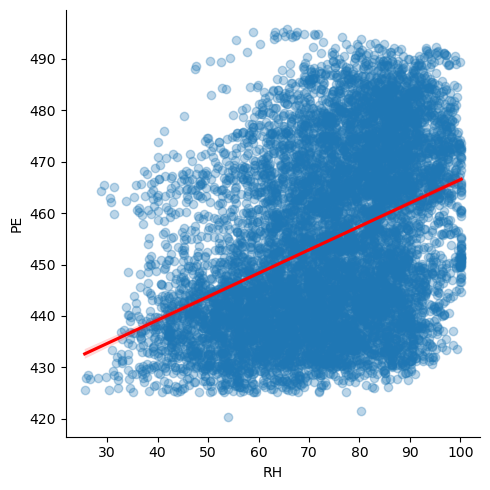

In [14]:
sns.lmplot(x = 'RH', y = 'PE', data = df, line_kws={'color': 'red'}, scatter_kws={'alpha': 0.3})

From the above tables, we can reach out to some important values of each predictor, such as p value, r square, and F-statistic.

We can notice that there are statistically significant association between all the predictors (AT,V,AP,RH) and the response (PE), because the p-value are less than 0.0001.

Approximately 89.9% of the variability in 'PE' is explained by 'AT'.

F-statistic of AT is almost 0, the overall significance of the model is very low.

Approximately 75.7% of the variability in 'PE' is explained by 'V'.

F-statistic of V is almost 0, the overall significance of the model is very low.

Approximately 26.9% of the variability in 'PE' is explained by 'AP'.

F-statistic of AP is 3516, the overall significance of the model is very high.

Approximately 15.2% of the variability in 'PE' is explained by 'RH'.

F-statistic of RH is 1714, the overall significance of the model is very high.

In [15]:
outliers_AT = mr_fit_AT.get_influence()
outliers_V = mr_fit_V.get_influence()
outliers_AP = mr_fit_AP.get_influence()
outliers_RH = mr_fit_RH.get_influence()

# Reference: Piazza @204

In [16]:
print('The outliers of AT that I would like to move are below:')
studentized_residuals_AT = outliers_AT.resid_studentized_external

df[abs(studentized_residuals_AT)>2]

The outliers of AT that I would like to move are below:


,AT,V,AP,RH,PE
15,21.42,43.79,1015.76,43.08,462.19
61,29.01,65.71,1013.61,48.07,446.22
87,32.72,69.75,1009.60,49.35,437.99
121,27.54,66.93,1017.06,55.20,450.22
140,4.99,39.04,1020.45,78.89,472.52
...,...,...,...,...,...
9469,23.65,71.98,1006.09,93.39,434.11
9475,30.26,59.22,1013.18,61.08,442.98
9477,34.03,73.56,1006.49,51.07,440.29
9491,20.88,56.85,1010.91,84.28,440.08


In [17]:
print('The outliers of V that I would like to move are below:')
studentized_residuals_V = outliers_V.resid_studentized_external
df[abs(studentized_residuals_V)>2]

The outliers of V that I would like to move are below:


,AT,V,AP,RH,PE
21,5.41,40.07,1019.16,64.77,495.24
24,27.36,48.60,1003.18,54.93,436.06
47,21.22,43.43,1010.96,61.07,448.06
57,5.91,39.33,1010.18,95.53,491.49
117,22.99,46.21,1010.71,60.11,444.36
...,...,...,...,...,...
9404,23.82,44.89,1009.39,74.69,445.45
9438,26.56,52.30,1007.40,62.04,439.25
9463,5.71,45.87,1012.04,93.42,482.49
9471,26.98,43.77,1010.95,40.80,446.05


In [18]:
print('The outliers of AP that I would like to move are below:')
studentized_residuals_AP = outliers_AT.resid_studentized_external
df[abs(studentized_residuals_AP)>2]

The outliers of AP that I would like to move are below:


,AT,V,AP,RH,PE
15,21.42,43.79,1015.76,43.08,462.19
61,29.01,65.71,1013.61,48.07,446.22
87,32.72,69.75,1009.60,49.35,437.99
121,27.54,66.93,1017.06,55.20,450.22
140,4.99,39.04,1020.45,78.89,472.52
...,...,...,...,...,...
9469,23.65,71.98,1006.09,93.39,434.11
9475,30.26,59.22,1013.18,61.08,442.98
9477,34.03,73.56,1006.49,51.07,440.29
9491,20.88,56.85,1010.91,84.28,440.08


In [19]:
print('The outliers of RH that I would like to move are below:')
studentized_residuals_RH = outliers_RH.resid_studentized_external
df[abs(studentized_residuals_RH)>2]

The outliers of RH that I would like to move are below:


,AT,V,AP,RH,PE
8,14.64,45.00,1021.78,41.25,475.98
21,5.41,40.07,1019.16,64.77,495.24
199,6.25,40.07,1020.19,65.24,494.39
252,5.89,39.48,1005.11,59.83,484.91
310,23.13,71.25,1002.49,94.59,431.91
...,...,...,...,...,...
9361,27.20,78.05,1010.15,90.20,430.55
9431,25.88,69.13,1002.44,85.67,426.14
9448,8.47,41.03,1021.72,70.16,485.10
9495,26.66,73.56,1006.90,99.27,433.62


### (d) Multiple Regression

In [20]:
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values
reg = linear_model.LinearRegression()
reg.fit(X, y)
reg.coef_

array([-1.97751311, -0.23391642,  0.06208294, -0.1580541 ])

The values above represent the estimated coefficients of the multiple regression model.

In [21]:
mr_fit_multi = sm.formula.ols('PE~AT + V + AP+ RH', data = df).fit()
mr_fit_multi.pvalues

Intercept     0.000000e+00
AT            0.000000e+00
V            4.375305e-215
AP            5.507109e-11
RH           3.104584e-293
dtype: float64

All of the predictors AT,V,AP,RH  reject the null hypothesis H0 : βj = 0, because their p values are all less than 0.0001

### (e) 1c Compare to 1d

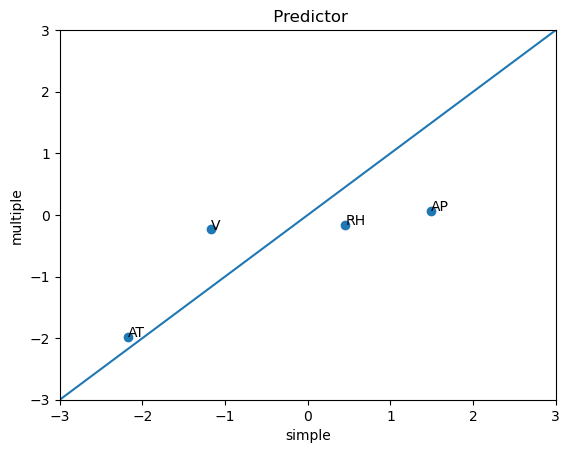

In [22]:
simple_coef_list = []
multi_coef_list = []

simple_coef_list.append(mr_fit_AT.params['AT'])
simple_coef_list.append(mr_fit_V.params['V'])
simple_coef_list.append(mr_fit_AP.params['AP'])
simple_coef_list.append(mr_fit_RH.params['RH'])
multi_coef_list.append(mr_fit_multi.params['AT'])
multi_coef_list.append(mr_fit_multi.params['V'])
multi_coef_list.append(mr_fit_multi.params['AP'])
multi_coef_list.append(mr_fit_multi.params['RH'])

plt.scatter( simple_coef_list, multi_coef_list,label = ["a"*4] )
plt.xlim((-3, 3)) 
plt.ylim((-3, 3)) 
plt.plot([-3, 3], [-3, 3]) 
plt.xlabel('simple')
plt.ylabel('multiple')
plt.title(' Predictor')

for i, label in enumerate(df.columns[:-1]):
    plt.text(simple_coef_list[i], multi_coef_list[i], label, fontsize=10)

The coefficient of AT and V is higher in multiple regression model, while the coefficient of RH and AP is higher in simple regression model

### (f) Nonlinear Association

In [23]:
model = sm.formula.ols('PE~AT + I(AT**2)+I(AT**3)', data = df).fit()
model.pvalues

Intercept      0.000000e+00
AT             7.898147e-07
I(AT ** 2)     8.833045e-73
I(AT ** 3)    3.652185e-110
dtype: float64

In [24]:
model = sm.formula.ols('PE~V + I(V**2)+I(V**3)', data = df).fit()
model.pvalues

Intercept    0.000000
V            0.000025
I(V ** 2)    0.768497
I(V ** 3)    0.013735
dtype: float64

In [25]:
model = sm.formula.ols('PE~AP + I(AP**2)+I(AP**3)', data = df).fit()
model.pvalues

Intercept     4.502734e-17
AP            4.502735e-17
I(AP ** 2)    3.666705e-17
I(AP ** 3)    8.264146e-18
dtype: float64

In [26]:
model = sm.formula.ols('PE~RH + I(RH**2)+I(RH**3)', data = df).fit()
model.pvalues

Intercept     0.000000
RH            0.000377
I(RH ** 2)    0.000009
I(RH ** 3)    0.000014
dtype: float64

For AT,AP,RH, there is evidence of nonlinear association to the response PE, because the p-value of these predictor's quadratic and cubic terms are less than 0.0001, which means they are statistically signficant, we reject the null hypothesis. 

### (g) Interactions of Predictors

In [27]:
X = df.iloc[:, :-1]
y = df.iloc[:, -1]
interactions = pd.DataFrame()

# get interaction terms 
for i in range(len(X.columns)):
    for j in range(i + 1, len(X.columns)):
        term = f'{X.columns[i]}*{X.columns[j]}'
        interactions[term] = X[X.columns[i]] * X[X.columns[j]]

X = sm.add_constant(pd.concat([X, interactions], axis=1))

model = sm.OLS(y, X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     PE   R-squared:                       0.936
Model:                            OLS   Adj. R-squared:                  0.936
Method:                 Least Squares   F-statistic:                 1.405e+04
Date:                Fri, 22 Sep 2023   Prob (F-statistic):               0.00
Time:                        11:08:33   Log-Likelihood:                -27548.
No. Observations:                9568   AIC:                         5.512e+04
Df Residuals:                    9557   BIC:                         5.520e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        685.7825     78.640      8.721      0.000     531.631     839.934
AT            -4.3470      2.373     -1.832      0.067      -8.999       0.305
V             -7.6749      1.351     -5.682      0.000     -10.323      -5.027
AP            -0.1524      0.077     -1.983      0.047      -0.303      -0.002
RH             1.5709      0.773      2.031      0.042       0.055       3.087
AT*V           0.0210      0.001     23.338      0.000       0.019       0.023
AT*AP          0.0018      0.002      0.752      0.452      -0.003       0.006
AT*RH         -0.0052      0.001     -6.444      0.000      -0.007      -0.004
V*AP           0.0068      0.001      5.135      0.000       0.004       0.009
V*RH           0.0008      0.000      1.716      0.086      -0.000       0.002
AP*RH         -0.0016      0.001     -2.125      0.034      -0.003      -0.000
==============================================================================
Omnibus:                     1454.609   Durbin-Watson:                   2.030
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             9170.848
Skew:                          -0.574   Prob(JB):                         0.00
Kurtosis:                       7.657   Cond. No.                     1.70e+08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.7e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

For these interactions: AT * V, AT * RH, V * AP,

they are statistically significant since the p-value is less than 0.0001.

### (h) Improvement

In [28]:
np.random.seed(1886)
shuffled_df = df.sample(frac=1)
cut = int(0.7 * len(shuffled_df))
train_set = shuffled_df.iloc[:cut]
test_set = shuffled_df.iloc[cut:]

X_train = train_set.iloc[:, :-1] # select all rows and all columns except the last column
y_train = train_set.iloc[:, -1] # selects all rows and only the last column
X_test = test_set.iloc[:, :-1]
y_test = test_set.iloc[:, -1]

In [30]:
X_train = sm.add_constant(X_train)
X_test = sm.add_constant(X_test)
model_ori = sm.OLS(y_train, X_train).fit()
y_train_pred = model_ori.predict(X_train)
y_test_pred = model_ori.predict(X_test)

train_MSE = mean_squared_error(y_train, y_train_pred)
test_MSE = mean_squared_error(y_test, y_test_pred)
print(f'For the first model, train MSE is {train_MSE}, test MSE is {test_MSE}')

For the first model, train MSE is 20.854125568407053, test MSE is 20.567027934135325


In [31]:
X = df.iloc[:, :-1]
y = df.iloc[:, -1]
all_possible_term = pd.DataFrame()
for i in range(len(X.columns)):
    for j in range(i,len(X.columns)):
        term = f'{X.columns[i]}*{X.columns[j]}'
        all_possible_term[term] = X[X.columns[i]] * X[X.columns[j]]

X_all = sm.add_constant(pd.concat([X, all_possible_term], axis=1))

model = sm.OLS(y, X_all).fit()

In [32]:
def get_max_p(X, y):
    model = sm.OLS(y, X).fit()
    return model.pvalues

p_list =get_max_p(X_all, y)

while max(p_list) > 0.05:
    extra = X_all.columns[np.argmax(p_list)]
    X_all = X_all.drop(columns=extra,axis =1)
    p_list = get_max_p(X_all, y)

model_all_upgrade = sm.OLS(y, X_all).fit()
model_all_upgrade.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     PE   R-squared:                       0.938
Model:                            OLS   Adj. R-squared:                  0.938
Method:                 Least Squares   F-statistic:                 1.310e+04
Date:                Fri, 22 Sep 2023   Prob (F-statistic):               0.00
Time:                        11:10:36   Log-Likelihood:                -27433.
No. Observations:                9568   AIC:                         5.489e+04
Df Residuals:                    9556   BIC:                         5.498e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -8287.2433   1049.226     -7.898      0.000   -1.03e+04   -6230.537
AT            -2.5810      0.094    -27.320      0.000      -2.766      -2.396
V             -4.0921      0.915     -4.472      0.000      -5.886      -2.298
AP            17.1239      2.042      8.385      0.000      13.121      21.127
RH             4.5267      0.694      6.526      0.000       3.167       5.886
AT*AT          0.0180      0.002      9.446      0.000       0.014       0.022
AT*V           0.0090      0.001      7.010      0.000       0.006       0.011
AT*RH         -0.0056      0.001     -7.187      0.000      -0.007      -0.004
V*AP           0.0036      0.001      3.985      0.000       0.002       0.005
AP*AP         -0.0083      0.001     -8.371      0.000      -0.010      -0.006
AP*RH         -0.0042      0.001     -6.293      0.000      -0.006      -0.003
RH*RH         -0.0019      0.000     -8.023      0.000      -0.002      -0.001
==============================================================================
Omnibus:                     1629.162   Durbin-Watson:                   2.028
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            11056.658
Skew:                          -0.643   Prob(JB):                         0.00
Kurtosis:                       8.107   Cond. No.                     2.48e+10
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.48e+10. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [33]:
DF = pd.concat((X_all,df['PE']), axis =1)
train_set = DF.iloc[:cut]
test_set = DF.iloc[cut:]

X_train = train_set.iloc[:, :-1].values # select all rows and all columns except the last column
y_train = train_set.iloc[:, -1].values # selects all rows and only the last column
X_test = test_set.iloc[:, :-1].values
y_test = test_set.iloc[:, -1].values

y_train_pred = model_all_upgrade.predict(X_train)
y_test_pred = model_all_upgrade.predict(X_test)

train_MSE = mean_squared_error(y_train, y_train_pred)
test_MSE = mean_squared_error(y_test, y_test_pred)
print(f'For the second model, train MSE is {train_MSE}, test MSE is {test_MSE}')

For the second model, train MSE is 17.63716899615998, test MSE is 19.21804897057974


### (i) KNN

For raw features, k = 6 gives you the best fit, since at this time it has the lowest MSE.


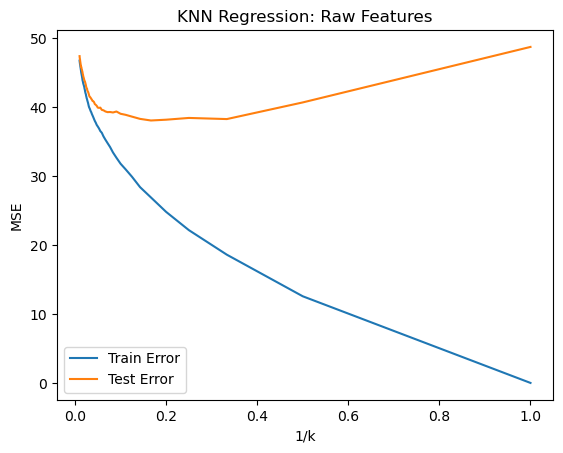

In [34]:
# For raw features
list_k = list(range(1, 101))
train_errors = []
test_errors = []


for k in list_k:
    knn = KNeighborsRegressor(n_neighbors=k)
    knn.fit(X_train,y_train)
    
    y_train_pred = knn.predict(X_train)
    y_test_pred = knn.predict(X_test)
    
    train_error = mean_squared_error(y_train,y_train_pred)
    test_error = mean_squared_error(y_test,y_test_pred)
    train_errors.append(train_error)
    test_errors.append(test_error)

best_k = list_k[np.argmin(test_errors)]     
    
plt.plot(1 / np.array(list_k), train_errors, label='Train Error')
plt.plot(1 / np.array(list_k), test_errors, label='Test Error')
plt.xlabel('1/k')
plt.ylabel('MSE')
plt.title('KNN Regression: Raw Features')
plt.legend()
print(f'For raw features, k = {best_k} gives you the best fit, since at this time it has the lowest MSE.')

For normalized features, k = 9 gives you the best fit, since at this time it has the lowest MSE.


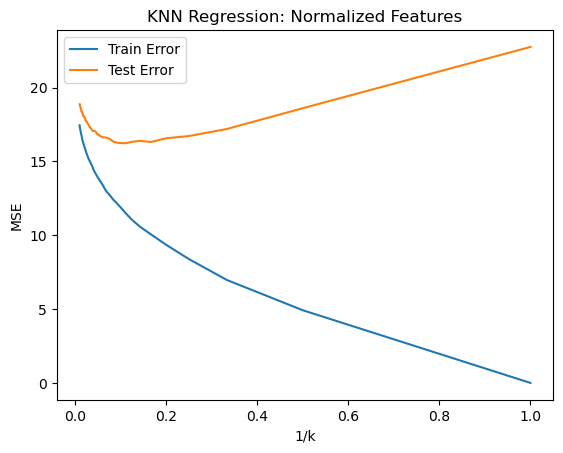

In [41]:
# normalized features
X_train_normal = minmax_scale(X_train)
X_test_normal = minmax_scale(X_test)
y_train_normal = y_train
y_test_normal = y_test

# For raw features
list_k = list(range(1, 101))
train_errors_normal = []
test_errors_normal = []

for k in list_k:
    knn = KNeighborsRegressor(n_neighbors=k)
    knn.fit(X_train_normal,y_train_normal)
    
    y_train_pred_normal = knn.predict(X_train_normal)
    y_test_pred_normal = knn.predict(X_test_normal)
    
    train_error_normal = mean_squared_error(y_train_normal,y_train_pred_normal)
    test_error_normal = mean_squared_error(y_test_normal,y_test_pred_normal)
    train_errors_normal.append(train_error_normal)
    test_errors_normal.append(test_error_normal)

best_k_normal = list_k[np.argmin(test_errors_normal)]     
    
plt.plot(1 / np.array(list_k), train_errors_normal, label='Train Error')
plt.plot(1 / np.array(list_k), test_errors_normal, label='Test Error')
plt.xlabel('1/k')
plt.ylabel('MSE')
plt.title('KNN Regression: Normalized Features')
plt.legend()
print(f'For normalized features, k = {best_k_normal} gives you the best fit, since at this time it has the lowest MSE.')

### (j ) Compare KNN and Linear

In [42]:
print(min(test_errors))
print(min(test_errors_normal))

38.04988236677115
16.233424177062236


The lowest test error I get from linear models is from the second one that contain interaction terms and nonliear associations, the test error is about 19.22; it is lower than the test error I get using raw features in KNN,which is around 38.05, it is higher than the test error I get using normalized features in KNN, which is around 16.23.

In conclusion, KNN may not perform well when the data is raw, it is better to normalize the data and then do the training and testing. If we normalize our data, we can make all features contribute equally to the distance calculations.Besides, we can say that in this dataset, linear regression also performance well. 

## 2. ISLR: 2.4.1

Good test set performance of a statistical learning method requires low variance as well as low squared bias.

### (a) The sample size n is extremely large, and the number of predictors p is small.

The performance of a flexible statistical learning method is better than an inflexible method.

Reason: In this situation, there will be low chance to have overfitting issue when using flexible statistical learning method. Besides, flexible method can learn and adapt more from the large data.

### (b) The number of predictors p is extremely large, and the number of observations n is small.

The performance of a flexible statistical learning method is worse than an inflexible method.

Reason: In contrast with (a), this situation will have a high risk of overfitting . As stated in the book ISLR p.22, more complex models can lead to overfitting, which essentially means they follow the errors, or noise, too closely. For inflexible method, a very large number of observations is required in order to obtain an accurate estimate for f.

### (c) The relationship between the predictors and response is highly non-linear.

The performance of a flexible statistical learning method is better than an inflexible method.

Reason: As stated in the book ISLR p.36, if the true f is highly non-linear and we have an ample number of training observations, then we may do better using a highly flexible approach.

### (d) The variance of the error terms, i.e. $σ^2$ = Var(ε), is extremely high.

The performance of a flexible statistical learning method is worse than an inflexible method.

Reason: High Variance of the error terms will lead to large noise. As stated in the book ISLR p.23, any parametric approach brings with it the possibility that the functional form used to estimate f is very different from the true f, in which case the resulting
model will not fit the data well. In contrast, inflexible methods completely avoid this danger, since essentially no assumption about the form of f is made.

## 3. ISLR: 2.4.7

### (a) Compute the Euclidean distance between each observation and the test point, X1 = X2 = X3 = 0.

In [36]:
dict_1 = {'X1':[0,2,0,0,-1,1],
          'X2':[3,0,1,1,0,1],
          'X3':[0,0,3,2,1,1],
          'Y':['Red','Red','Red','Green','Green','Red']
}
df_1 =pd.DataFrame(dict_1)
predictor = df_1.iloc[ :, :-1]
test_pt = [0,0,0]

list_distances =[]

for i in range(len(df_1)):
    distance = math.dist(predictor.iloc[i],test_pt)
    print(f'Obs.{i+1} and the test point has Euclidean distance of {distance}')
    list_distances.append((i + 1, distance))

Obs.1 and the test point has Euclidean distance of 3.0
Obs.2 and the test point has Euclidean distance of 2.0
Obs.3 and the test point has Euclidean distance of 3.1622776601683795
Obs.4 and the test point has Euclidean distance of 2.23606797749979
Obs.5 and the test point has Euclidean distance of 1.4142135623730951
Obs.6 and the test point has Euclidean distance of 1.7320508075688772


### (b) What is our prediction with K = 1? Why?

In [37]:
list_distances.sort(key = lambda x: x[1])
list_distances

[(5, 1.4142135623730951),
 (6, 1.7320508075688772),
 (2, 2.0),
 (4, 2.23606797749979),
 (1, 3.0),
 (3, 3.1622776601683795)]

Green.

We notice that for Observation 5, it has the closest distance to the test point, which means it is the nearest neighbor when K=1, so that our prediction will be Green, just like Observation 5.

### (c) What is our prediction with K = 3? Why?

Red

We notice that Observation 5,6,2 have the closest distance to the test point, which means they are the nearest neighbors when K=3, we have two Red and one Green as response; so that our prediction will be Red, since we have more Red than Green(Pr(Y='Red') = 2/3 >0.5).

### (d) If the Bayes decision boundary in this problem is highly non-linear, then would we expect the best value for K to be large or small? Why?

K should be small.

Since the Bayes decision boundary in this problem is highly non-linear, then the model will be more complex.For KNN, 1\K can represent as a measure of flexibility. Large K will result in inflexible.So, we'd better choose small K.

Reference
#https://medium.com/@ben.g.ballard/flexible-vs-inflexible-statistical-learning-methods-88b927c74d67
#https://www.statsmodels.org/dev/generated/statsmodels.regression.linear_model.OLS.html#statsmodels.regression.linear_model.OLS